# 1. Loading data

In [1]:
import pandas as pd
import numpy as np

In [15]:
E_feats = pd.read_csv('features/e_featuresall.csv').drop(['Unnamed: 0','Unnamed: 0.1','E_comid'],
                                                   axis=1).rename(columns={'E_uid':'uid',
                                                                           'E_target':'target'
                                                                          }).set_index('uid')
C_feats = pd.read_csv('features/c_featuresall.csv',index_col=0)
EG_feats = pd.read_csv('features/eg_featuresall.csv',index_col=0)
CE_feats = pd.read_csv('features/ce_featuresall.csv',index_col=0)
CEG_feats = pd.read_csv('features/ceg_featuresall.csv',index_col=0)
features = pd.read_csv('features/all_featuresall.csv',index_col=0).drop('Unnamed: 0.1',axis=1)
target = pd.read_csv('features/targetall.csv',index_col=0).rename(columns={'votes_num':'target'}).set_index('uid')

In [10]:
E_feats.columns.values

array(['E_votes_3', 'E_votes_num', 'E_votes_mean', 'E_votes_2',
       'E_votes_std', 'E_votes_1', 'E_votes_4', 'E_likes_mean',
       'E_likes_sum', 'E_likes_num', 'E_likes_std', 'E_dislikes_std',
       'E_dislikes_sum', 'E_dislikes_num', 'E_dislikes_mean', 'E_com_num',
       'E_com_std', 'E_com_sum', 'E_com_mean', 'target'], dtype=object)

In [11]:
drop_e = ['Unnamed: 0.1', 'E_comid']
drop_eg = ['uid']

In [12]:
EG_feats.columns.values

array(['uid', 'G_interactions_degree', 'G_interactions_w_degree',
       'G_interactions_degree_u', 'G_interactions_w_degree_u',
       'G_interactions_betweenness_centrality',
       'G_interactions_w_betweenness_centrality',
       'G_interactions_betweenness_centrality_u',
       'G_interactions_w_betweenness_centrality_u',
       'G_interactions_NMF1_d', 'G_interactions_NMF1_u',
       'G_interactions_NMF2_d', 'G_interactions_NMF2_u',
       'G_rel_agree_degree', 'G_rel_agree_w_degree',
       'G_rel_agree_degree_u', 'G_rel_agree_w_degree_u',
       'G_rel_agree_betweenness_centrality',
       'G_rel_agree_w_betweenness_centrality',
       'G_rel_agree_betweenness_centrality_u',
       'G_rel_agree_w_betweenness_centrality_u', 'G_rel_agree_NMF1_d',
       'G_rel_agree_NMF1_u', 'G_rel_agree_NMF2_d', 'G_rel_agree_NMF2_u'], dtype=object)

In [79]:
target = pd.read_csv('clean_data/target_ml.csv').rename(columns={'votes_num':'target'}).set_index('uid')

In [14]:
target

,uid,target
0,0_18,1
1,0_20,1
2,0_259,1
3,0_27,1
4,0_31,1
5,0_32,1
6,0_33,0
7,0_37,1
8,0_38,1
9,0_39,1


In [13]:
E_feats['target'].value_counts()

1    2881
0     406
Name: target, dtype: int64

In [16]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier as GBM
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
def draw_roc_cv(clf,X,y,average='micro',cv=10):
    # Run classifier with cross-validation and plot ROC curves
    cv = StratifiedKFold(n_splits=cv)
    classifier = clf

    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)

    colors = cycle(['cyan', 'indigo', 'seagreen',
                    'yellow', 'blue', 'darkorange',
                    'green','grey','magenta','brown'])
    lw = 2

    i = 0
    plt.figure(figsize=(10,5))
    for (train, test), color in zip(cv.split(X, y), colors):
        probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        _ = plt.plot(fpr, tpr, lw=lw, color=color,
                 label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

        i += 1
    _ = plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
             label='Luck')

    mean_tpr /= cv.get_n_splits(X, y)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    
    _ = plt.plot(mean_fpr, mean_tpr, color='r', linestyle='--',
             label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [17]:
features['E_comid','CE_comid','uid'].columns.values

KeyError: ('E_comid', 'CE_comid', 'uid')

In [20]:
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
cnn = CondensedNearestNeighbour()
X=features.drop(['E_comid','CE_comid','uid'],axis=1).fillna(0).values
y = target.votes_num.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
#X_resampled, y_resampled = balancer.fit_sample(X_train, y_train)


y_pred = pipeline.fit(X_train, y_train).predict(X_test)
cmat = confusion_matrix(y_test, y_pred)
sns.heatmap(cmat/cmat.sum())

AttributeError: 'DataFrame' object has no attribute 'votes_num'

In [59]:
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import (EditedNearestNeighbours,
                                     RepeatedEditedNearestNeighbours)
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.over_sampling import SMOTE
threshold = 0.02 #keep for ML importances above threshold
clf = DecisionTreeClassifier(criterion='entropy')
clf = GBM(max_depth=4,n_estimators=200)
balancer = SMOTE()
enn = EditedNearestNeighbours()
renn = RepeatedEditedNearestNeighbours()
stdsc = StandardScaler()
pipeline = make_pipeline( enn, renn,stdsc, clf)
cv = 4

In [60]:
def eval_features(df,clf=GBM(), cv=5, threshold=0.02):
    ML_features =df.copy()
    X = ML_features.copy().drop(['target'],axis=1).fillna(-1).values
    y = ML_features['target'].values.copy()

    #X_resampled, y_resampled = balancer.fit_sample(X, y)
    clf.fit(X, y)
    try:
        feats = pd.Series(index=ML_features.drop(['target'],axis=1).columns.values,data=clf.steps[3][1].feature_importances_)
    except:
        feats = pd.Series(index=ML_features.drop(['target'],axis=1).columns.values,data=clf.feature_importances_)
    cols_E = feats[feats>threshold].sort_values(ascending=False).index[:5].values.tolist()
    scores = cross_val_score(clf,X, y, cv=cv)
    draw_roc_cv(clf,X,y,average='macro',cv=cv)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    scores_f1 = cross_val_score(clf,X, y, cv=cv, scoring='f1_macro')
    print("F1 score: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std() * 2))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
    #X_resampled, y_resampled = balancer.fit_sample(X_train, y_train)


    y_pred = clf.fit(X_train, y_train).predict(X_test)
    cmat = confusion_matrix(y_test, y_pred)
    print(cmat)
    _ = sns.heatmap(cmat,annot=True)
    return feats[feats>threshold].sort_values(ascending=False)

In [54]:
E_feats

,E_votes_3,E_votes_num,E_votes_mean,E_votes_2,E_votes_std,E_votes_1,E_votes_4,E_likes_mean,E_likes_sum,E_likes_num,E_likes_std,E_dislikes_std,E_dislikes_sum,E_dislikes_num,E_dislikes_mean,E_com_num,E_com_std,E_com_sum,E_com_mean,target
uid,,,,,,,,,,,,,,,,,,,,
0_18,93,168,3.232143,15,0.656366,2,58,5.355556,241.0,45.0,3.317691,0.829993,29.0,45.0,0.644444,45.0,31.872346,2318.0,51.511111,1
0_20,9,36,3.527778,4,0.696362,0,23,3.000000,6.0,2.0,0.000000,0.707107,1.0,2.0,0.500000,1.0,NaN,30.0,30.000000,1
0_259,2,18,3.500000,2,0.923548,1,13,4.800000,48.0,10.0,4.685676,0.316228,1.0,10.0,0.100000,10.0,50.570523,866.0,86.600000,1
0_27,30,56,2.767857,15,0.762557,3,8,3.807692,99.0,26.0,3.033404,1.704745,29.0,26.0,1.115385,26.0,43.375640,1472.0,56.615385,1
0_31,36,201,3.477612,24,0.837106,7,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
0_32,24,35,3.085714,4,0.562109,0,7,5.666667,17.0,3.0,1.527525,0.000000,0.0,3.0,0.000000,3.0,64.763673,317.0,105.666667,1
0_33,0,75,3.973333,1,0.230940,0,74,4.133333,62.0,15.0,2.825058,2.086236,31.0,15.0,2.066667,14.0,35.778009,662.0,47.285714,0
0_37,12,57,3.754386,1,0.473615,0,44,4.529412,77.0,17.0,2.917997,0.437237,4.0,17.0,0.235294,17.0,15.647543,454.0,26.705882,1
0_38,103,258,2.298450,102,0.789078,44,9,3.837838,284.0,74.0,2.627708,0.801239,48.0,74.0,0.648649,74.0,43.713584,4452.0,60.162162,1


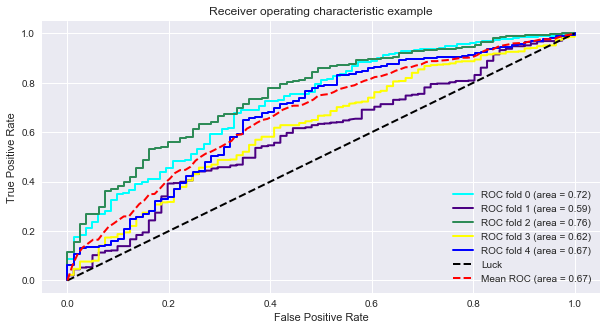

Accuracy: 0.75 (+/- 0.10)
F1 score: 0.58 (+/- 0.09)
[[ 43  39]
 [122 454]]


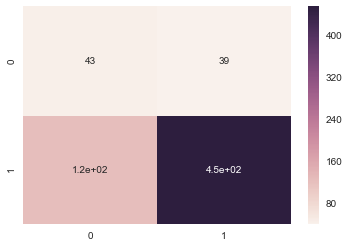

In [61]:
features.drop(['E_comid','CE_comid'],axis=1).fillna(0)
#E_feats.drop(['Unnamed: 0.1', 'E_comid'],axis=1).fillna(-1)
best_e = eval_features(E_feats.fillna(-1),clf=pipeline)

In [34]:
best_e.index.values

array(['E_votes_num', 'E_com_sum', 'E_com_mean', 'E_votes_std',
       'E_votes_3', 'E_votes_mean', 'E_likes_std', 'E_com_std',
       'E_likes_mean', 'E_likes_sum', 'E_dislikes_mean', 'E_votes_4',
       'E_votes_2', 'E_dislikes_std', 'E_dislikes_sum', 'E_votes_1'], dtype=object)

In [87]:
target

,target
uid,
0_25,1
0_259,1
0_271,1
0_277,1
0_278,1
0_31,1
0_38,1
0_39,1
0_54,1


In [89]:
pd.merge(EG_feats.fillna(-1),target,right_index=True,left_on='uid')

,uid,G_interactions_degree,G_interactions_w_degree,G_interactions_degree_u,G_interactions_w_degree_u,G_interactions_betweenness_centrality,G_interactions_w_betweenness_centrality,G_interactions_betweenness_centrality_u,G_interactions_w_betweenness_centrality_u,G_interactions_NMF1_d,...,G_rel_agree_w_degree_u,G_rel_agree_betweenness_centrality,G_rel_agree_w_betweenness_centrality,G_rel_agree_betweenness_centrality_u,G_rel_agree_w_betweenness_centrality_u,G_rel_agree_NMF1_d,G_rel_agree_NMF1_u,G_rel_agree_NMF2_d,G_rel_agree_NMF2_u,target
2,0_259,0.079167,0.014613,0.084967,0.018452,0.001645,0.020547,0.001456,0.018689,0.0,...,0.101256,0.001645,1.658134e-07,0.001456,4.848903e-24,0.0,0.000000,0.000000,0.610379,1
4,0_31,0.025000,0.003653,0.039216,0.006017,0.000000,0.000000,0.000294,0.002783,0.0,...,0.050628,0.000000,0.000000e+00,0.000294,0.000000e+00,0.0,0.000000,0.000000,0.000000,1
8,0_38,0.141667,0.103994,0.124183,0.105495,0.013578,0.010692,0.012278,0.011866,0.0,...,0.143485,0.013578,4.787111e-07,0.012278,5.627382e-23,0.0,0.000000,0.000000,0.000000,1
9,0_39,0.104167,0.039454,0.104575,0.042118,0.003734,0.013665,0.006402,0.019081,0.0,...,0.110066,0.003734,4.138701e-07,0.006402,1.998180e-22,0.0,0.000000,0.000000,0.000000,1
14,0_57,0.066667,0.011203,0.071895,0.010028,0.000101,0.001705,0.000131,0.006763,0.0,...,0.081568,0.000101,0.000000e+00,0.000131,2.222414e-24,0.0,0.000000,0.000000,0.000000,0
15,0_62,0.045833,0.006819,0.045752,0.007621,0.000000,0.018686,0.000131,0.010347,0.0,...,0.059066,0.000000,0.000000e+00,0.000131,0.000000e+00,0.0,0.000000,0.000000,0.000000,1
18,11_10,0.104167,0.006819,0.143791,0.009627,0.000825,0.031670,0.001481,0.046021,0.0,...,0.101256,0.000825,4.965479e-02,0.001481,8.147273e-12,0.0,0.000000,0.000000,0.000000,1
19,11_100,0.387500,0.059912,0.483660,0.073807,0.033328,0.151238,0.092247,0.299632,0.0,...,0.589457,0.033328,4.250738e-04,0.092247,1.731873e-12,0.0,0.000000,0.000000,0.240038,1
20,11_101,0.454167,0.131028,0.640523,0.198957,0.021286,0.090956,0.195688,0.202215,0.0,...,0.620069,0.021286,6.680277e-06,0.195688,9.116998e-08,0.0,0.000000,0.000000,0.000000,1
21,11_102,0.550000,0.061374,0.627451,0.070999,0.184273,0.564271,0.387838,1.000000,0.0,...,0.569286,0.184273,6.640551e-02,0.387838,4.029989e-06,0.0,0.000000,0.000000,0.000000,1


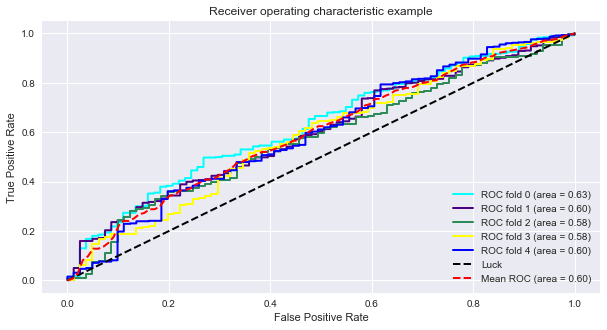

Accuracy: 0.76 (+/- 0.03)
F1 score: 0.54 (+/- 0.04)
[[ 22  63]
 [ 97 476]]


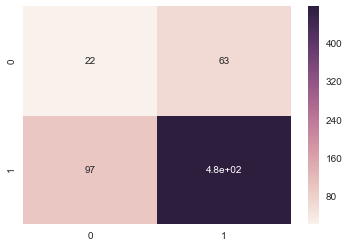

In [62]:
ceg_best = eval_features(pd.merge(CEG_feats.fillna(-1),target,right_index=True,left_on='uid').drop('uid',axis=1),clf=pipeline)

In [44]:
CEG_feats[ceg_best.index.values.tolist()[:10]+['uid']].fillna(-1)

,CEG_rel_agree_NMF2_u,CEG_interactions_w_betweenness_centrality_u,CEG_interactions_NMF1_d,CEG_interactions_NMF1_u,CEG_rel_agree_NMF2_d,CEG_interactions_NMF2_d,CEG_rel_agree_NMF1_d,CEG_rel_agree_w_degree,CEG_interactions_NMF2_u,CEG_interactions_w_betweenness_centrality,uid
0,0.000702,0.055791,4.711357,0.825898,0.929246,4.910908,0.530577,1.000000,7.319158,0.100953,0_18
1,0.925619,0.367073,0.035596,0.125994,0.000000,0.133779,0.378094,0.027332,0.175393,0.296338,0_20
2,0.000000,1.000000,0.734949,0.573193,0.582790,0.000000,0.415720,0.515409,0.356527,0.677075,0_259
3,0.734060,0.671266,0.310374,1.928722,0.154439,0.502442,0.735578,0.627937,0.000000,0.587660,0_27
4,1.397648,0.017881,0.052971,0.071463,0.000000,0.576298,0.665065,0.068331,0.566780,0.000000,0_31
5,0.047844,0.207726,0.529048,0.793650,0.572468,0.012503,0.171206,0.326035,0.113835,0.480938,0_32
6,0.827949,0.109829,0.706874,0.803982,0.497126,1.212924,0.737263,0.666750,1.228440,0.362741,0_33
7,0.151533,0.908380,0.309675,0.000000,0.266017,0.900506,0.794475,0.764914,2.186739,1.000000,0_37
8,0.160190,0.073899,5.471902,3.913359,1.013630,2.678373,0.370119,0.950907,5.807526,0.352333,0_38
9,0.077581,0.268554,2.722217,2.773985,0.470565,0.775387,0.692855,0.632163,1.383366,0.450276,0_39


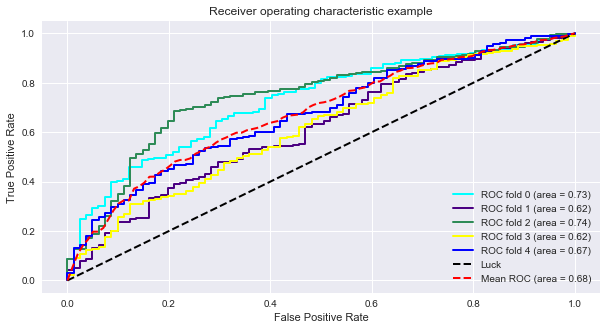

Accuracy: 0.86 (+/- 0.03)
F1 score: 0.51 (+/- 0.04)
[[  7  78]
 [ 11 562]]


E_votes_num                                    0.082556
CEG_interactions_NMF1_u                        0.071544
E_votes_std                                    0.066915
CEG_rel_agree_w_degree                         0.063396
CEG_interactions_w_betweenness_centrality_u    0.062042
CEG_interactions_NMF2_u                        0.060740
CEG_interactions_NMF1_d                        0.058735
CEG_interactions_w_betweenness_centrality      0.058585
CEG_rel_agree_NMF1_d                           0.055864
CEG_rel_agree_NMF2_u                           0.051158
CEG_interactions_NMF2_d                        0.048155
CEG_rel_agree_NMF2_d                           0.048083
E_votes_mean                                   0.046734
E_com_std                                      0.044648
E_com_mean                                     0.042064
E_likes_mean                                   0.041234
E_likes_sum                                    0.031526
E_com_sum                                      0

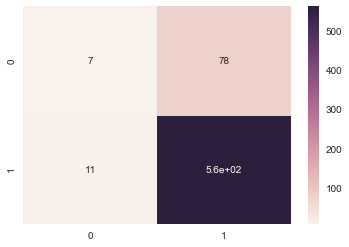

In [63]:
eval_features(pd.merge(CEG_feats[ceg_best.index.values.tolist()[:10]+['uid']].fillna(-1),E_feats[best_e.index.values.tolist()[:10]+['target']].fillna(-1),right_index=True,left_on='uid').drop('uid',axis=1),clf=clf)

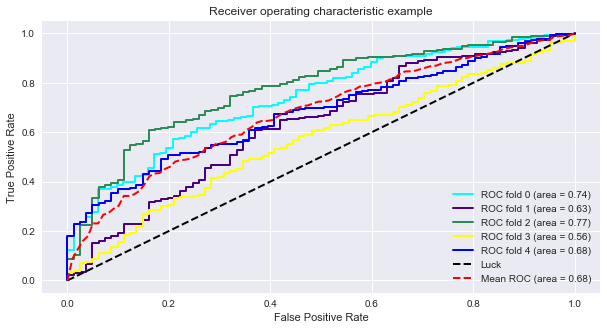

Accuracy: 0.76 (+/- 0.17)
F1 score: 0.56 (+/- 0.11)
[[ 35  50]
 [ 75 498]]


E_votes_num                                    0.111274
E_com_sum                                      0.081357
E_votes_std                                    0.063822
E_com_mean                                     0.058852
CEG_rel_agree_w_degree                         0.058694
CEG_interactions_NMF1_u                        0.055372
CEG_rel_agree_NMF1_d                           0.050586
E_likes_mean                                   0.050008
CEG_interactions_w_betweenness_centrality_u    0.049778
CEG_interactions_NMF1_d                        0.045709
E_com_std                                      0.044444
CEG_interactions_w_betweenness_centrality      0.044343
CEG_interactions_NMF2_u                        0.043972
E_votes_mean                                   0.043306
CEG_rel_agree_NMF2_u                           0.039890
CEG_interactions_NMF2_d                        0.035579
E_votes_3                                      0.032739
E_likes_sum                                    0

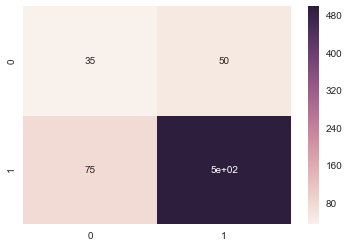

In [64]:
eval_features(pd.merge(CEG_feats[ceg_best.index.values.tolist()[:10]+['uid']].fillna(-1),E_feats[best_e.index.values.tolist()[:10]+['target']].fillna(-1),right_index=True,left_on='uid').drop('uid',axis=1),clf=pipeline)

In [52]:
feats_df = pd.merge(target.rename(columns={'votes_num':'target'}),features,right_on='uid',left_on='uid')

In [62]:
columns= ['com_std',
'CE_votes_num',
'CEG_interactions_NMF2_u',
'G_interactions_w_betweenness_centrality_u',
'votes_mean',
'E_votes_num',
'CEG_rel_agree_NMF2_u',
'votes_4',
'CEG_interactions_w_betweenness_centrality_u',
'G_interactions_w_betweenness_centrality',
'com_mean',
'CEG_interactions_NMF1_u',
'E_votes_std',
'CEG_rel_agree_NMF1_d',
'CEG_interactions_w_degree',
'G_rel_agree_w_betweenness_centrality',
'CEG_interactions_w_degree_u',
'CEG_rel_agree_NMF1_u',
'dislikes_std',
'CEG_rel_agree_NMF2_d',
'votes_std',
'CEG_interactions_NMF1_d',
'dislikes_mean',
'CE_likes_std',
'CE_votes_std',
'likes_mean',
'G_rel_agree_w_degree',
'G_interactions_w_degree_u',
'CE_com_mean',
'votes_2',
'E_likes_std',
'E_com_sum',
'CEG_interactions_NMF2_d',
'CE_com_std',
'G_rel_agree_NMF1_u',
'G_rel_agree_w_degree_u',
'CE_com_sum',
'CEG_interactions_w_betweenness_centrality',
'votes_3',
'E_com_mean']  

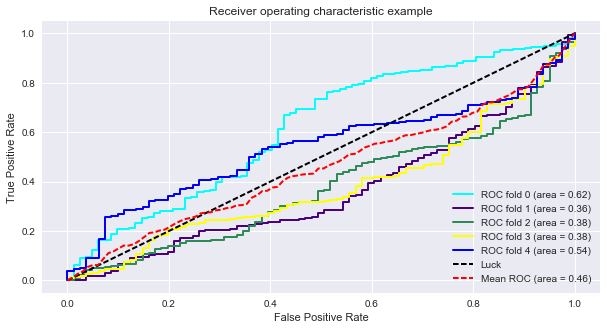

Accuracy: 0.59 (+/- 0.09)
F1 score: 0.44 (+/- 0.10)
[[ 32  50]
 [ 74 502]]


CE_votes_num                                   0.045606
E_votes_num                                    0.040986
G_rel_agree_w_betweenness_centrality           0.040344
CEG_interactions_w_degree                      0.036465
CEG_interactions_NMF1_u                        0.035479
votes_2                                        0.035160
com_std                                        0.034376
G_interactions_w_betweenness_centrality_u      0.031455
CEG_rel_agree_NMF2_u                           0.030522
G_rel_agree_w_degree_u                         0.030416
G_interactions_w_betweenness_centrality        0.028956
CE_com_std                                     0.028848
CEG_interactions_w_betweenness_centrality_u    0.028733
CEG_interactions_w_degree_u                    0.028358
votes_mean                                     0.028124
CEG_interactions_NMF2_u                        0.026880
dislikes_std                                   0.026287
E_votes_std                                    0

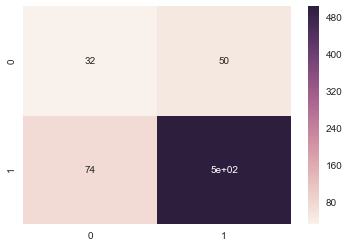

In [66]:
eval_features(feats_df[columns+['target']].fillna(-1),clf=pipeline,threshold=0.01)

In [18]:
feats = pd.merge(E_feats[['target']],CEG_feats,left_index=True,right_index=True,how='outer')
feats = pd.merge(feats,E_feats.drop('target',axis=1),left_index=True,right_index=True,how='outer')
feats = pd.merge(feats,CE_feats,left_index=True,right_index=True,how='outer')
#feats = pd.merge(feats,C_feats,left_index=True,right_index=True,how='outer')
feats = pd.merge(feats,EG_feats,left_index=True,right_index=True,how='outer')
eval_features(feats,pipeline,cv=4)

ValueError: could not convert string to float: '8_9'

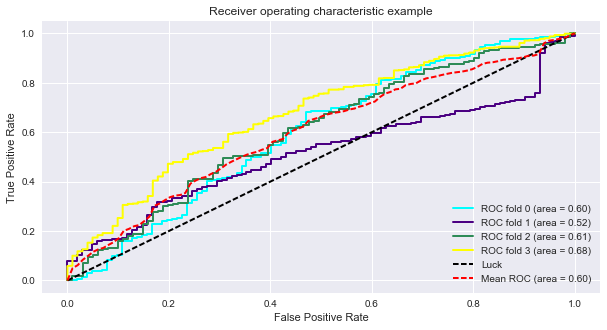

Accuracy: 0.81 (+/- 0.17)
F1 score: 0.49 (+/- 0.10)


E_votes_num        0.178704
Unnamed: 0.1       0.125172
E_votes_std        0.106650
E_comid            0.094177
E_votes_mean       0.065211
E_com_std          0.056615
E_com_mean         0.055139
E_likes_mean       0.052079
E_votes_4          0.045894
E_dislikes_mean    0.038722
E_likes_std        0.033100
E_votes_3          0.031514
E_likes_sum        0.022620
E_com_sum          0.021664
E_dislikes_std     0.020680
E_com_num          0.012623
E_dislikes_sum     0.011035
E_dislikes_num     0.009963
E_votes_2          0.009762
E_likes_num        0.005561
E_votes_1          0.003114
dtype: float64

In [23]:

#from imblearn.under_sampling import CondensedNearestNeighbour
#from imblearn.over_sampling import SMOTE
ML_features = E_feats.copy()
threshold = 0.02
cv = 4
X = ML_features.copy().drop(['target'],axis=1).fillna(-1).values
y = ML_features['target'].values.copy()

#X_resampled, y_resampled = balancer.fit_sample(X, y)
clf = GBM()
clf.fit(X, y)
feats = pd.Series(index=ML_features.drop(['target'],axis=1).columns.values,data=clf.feature_importances_)
cols_E = feats[feats>threshold].sort_values(ascending=False).index[:5].values.tolist()
scores = cross_val_score(clf,X, y, cv=cv)
draw_roc_cv(clf,X,y,average='macro',cv=cv)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores_f1 = cross_val_score(clf,X, y, cv=cv, scoring='f1_macro')
print("F1 score: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std() * 2))

feats.sort_values(ascending=False)